<a href="https://colab.research.google.com/github/ivkarla/connectivity_change_reproducible/blob/main/notebooks/confusion_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

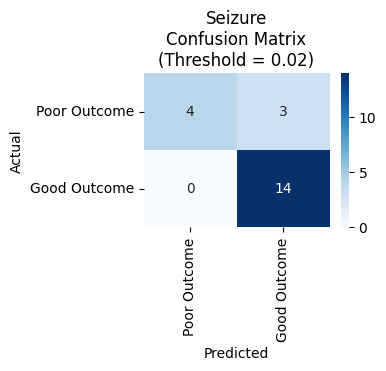

Optimal threshold: 0.02
Best F1 score: 0.90
Misclassified Good keys: []
Misclassified Poor keys: [9, 16, 17]


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the scores
# woi = "Non-seizure"
# good_scores = {
#     0: 0.222222, 1: 0.488126, 3: 0.237500, 4: 0.202778, 6: 0.743750, 7: 0.105208, 8: 0.355208,
#     12: 0.591122, 13: 0.039474, 14: 0.184659, 15: 0.128045, 18: 0.475000, 19: 0.125000, 20: 0.142361
# }

# poor_scores = {
#     2: 0.071338, 5: 0.076923, 9: 0.091912, 10: 0.190909, 11: 0.000000, 16: 0.087037, 17: 0.120942
# }

# woi = "Pre-seizure"
# good_scores = {
#     0: 0.150000, 1: 0.575641, 3: 0.250242, 4: 0.193030, 6: 0.700768, 7: 0.173684, 8: 0.319444,
#     12: 0.421591, 13: 0.000000, 14: 0.175714, 15: 0.176111, 18: 0.563736, 19: 0.014815, 20: 0.338333
# }

# poor_scores = {
#     2: 0.111905, 5: 0.050000, 9: 0.070563, 10: 0.143182, 11: 0.000000, 16: 0.161828, 17: 0.141071
# }

# woi = "Transition"
# good_scores = {
#     0: 0.108553, 1: 0.700000, 3: 0.273339, 4: 0.151786, 6: 0.683658, 7: 0.120833, 8: 0.326563,
#     12: 0.256250, 13: 0.000000, 14: 0.062500, 15: 0.130919, 18: 0.491880, 19: 0.183578, 20: 0.203788
# }

# poor_scores = {
#     2: 0.098214, 5: 0.000000, 9: 0.032609, 10: 0.090774, 11: 0.036458, 16: 0.043155, 17: 0.106534
# }

woi = "Seizure"
good_scores = {
    0: 0.022222, 1: 0.303571, 3: 0.274411, 4: 0.047619, 6: 0.269231, 7: 0.271958, 8: 0.274411,
    12: 0.343434, 13: 0.051282, 14: 0.109408, 15: 0.091954, 18: 0.430406, 19: 0.106091, 20: 0.236753
}

poor_scores = {
    2: 0.021739, 5: 0.000000, 9: 0.121338, 10: 0.019608, 11: 0.000000, 16: 0.107527, 17: 0.230159
}

# Combine scores into a single DataFrame
all_scores = {**good_scores, **poor_scores}
labels = {k: 'good' for k in good_scores}
labels.update({k: 'poor' for k in poor_scores})

df = pd.DataFrame(list(all_scores.items()), columns=['index', 'score'])
df['label'] = df['index'].map(labels)
df['label'] = df['label'].map({'good': 1, 'poor': 0})

# Find the optimal threshold
thresholds = np.linspace(0, 1, 1000)
best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    df['pred'] = (df['score'] >= threshold).astype(int)
    f1 = f1_score(df['label'], df['pred'])
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Compute the confusion matrix
df['pred'] = (df['score'] >= best_threshold).astype(int)
cm = confusion_matrix(df['label'], df['pred'])

# Visualize the confusion matrix
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor Outcome', 'Good Outcome'], yticklabels=['Poor Outcome', 'Good Outcome'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{woi}\nConfusion Matrix\n(Threshold = {best_threshold:.2f})')
plt.show()

# Print the best threshold and associated F1 score
print(f'Optimal threshold: {best_threshold:.2f}')
print(f'Best F1 score: {best_f1:.2f}')

# Find misclassified keys
misclassified_good = df[(df['label'] == 1) & (df['pred'] == 0)]['index'].tolist()
misclassified_poor = df[(df['label'] == 0) & (df['pred'] == 1)]['index'].tolist()

# Print misclassified keys
print(f'Misclassified Good keys: {misclassified_good}')
print(f'Misclassified Poor keys: {misclassified_poor}')
